In [400]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# showing all columns
pd.options.display.max_columns = None

In [151]:
#reading the doc
df = pd.read_excel('owid-energy-data.xlsx')
df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [152]:
columns = []
for index in df.columns:
    columns.append(index)
print(columns)

['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh', 'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec', 'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption', 'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh', 'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_cons_change_pc

In [351]:
energyny = df[['country','renewables_electricity','other_renewables_elec_per_capita','other_renewables_energy_per_capita','renewables_elec_per_capita','renewables_energy_per_capita','renewables_share_energy']]
energyny

,country,renewables_electricity,other_renewables_elec_per_capita,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_energy_per_capita,renewables_share_energy
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17427,Zimbabwe,5.076,9.265,NaN,367.427,NaN,NaN
17428,Zimbabwe,3.111,10.478,NaN,221.739,NaN,NaN
17429,Zimbabwe,4.091,10.606,NaN,287.350,NaN,NaN
17430,Zimbabwe,5.201,12.951,NaN,360.205,NaN,NaN


In [171]:
energygrouped = energyny.groupby('country').mean().sort_values('renewables_electricity', ascending=False)
ea = energygrouped['renewables_electricity'].head(60).round(0)
ea

country
World                      3644.0
Asia Pacific               1001.0
North America               822.0
Europe                      795.0
China                       605.0
South & Central America     593.0
United States               429.0
Canada                      363.0
Brazil                      334.0
CIS                         216.0
Russia                      172.0
Japan                       132.0
Norway                      123.0
India                       122.0
Africa                       91.0
Germany                      83.0
Sweden                       79.0
France                       76.0
Italy                        65.0
Venezuela                    59.0
Spain                        57.0
Other South America          56.0
Paraguay                     54.0
Turkey                       47.0
Austria                      42.0
Eastern Africa               41.0
Colombia                     38.0
Mexico                       38.0
Switzerland                  37.0
Other 

In [294]:
world = {'World': ea[0]}
continents = {
    'Asia Pacific': ea[1],
    'North America':ea[2],
    'Europe':ea[3],
    'S.C. America':ea[5]}

countries = {
    'China':ea[4],
    'United States':ea[6],
    'Canada':ea[7],
    'Brazil':ea[8],
    'Russia':ea[10]}

In [295]:
names = list(continents.keys())
values = list(continents.values())

ValueError: too many values to unpack (expected 2)

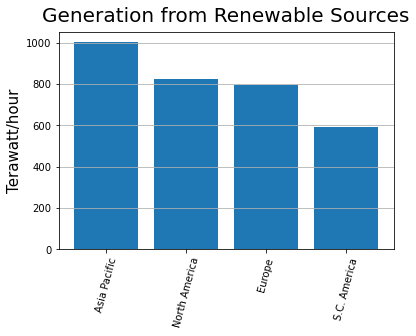

In [296]:
plt.grid(True, axis='y')
plt.xticks(rotation=75)
plt.ylabel('Terawatt/hour', size=15)
plt.title('Generation from Renewable Sources', size=20,pad=10)
fig,axs = plt.bar(names,values)




In [297]:
names1 = list(countries.keys())
values1 = list(countries.values())

ValueError: too many values to unpack (expected 2)

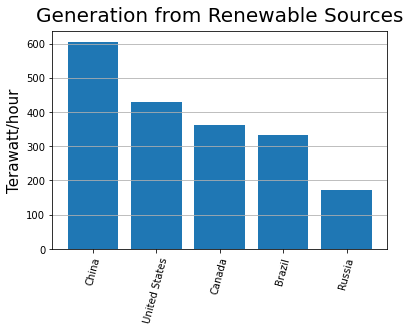

In [298]:
plt.grid(True, axis='y')
plt.xticks(rotation=75)
plt.ylabel('Terawatt/hour', size=15)
plt.title('Generation from Renewable Sources', size=20,pad=10)
fig,axs = plt.bar(names1,values1)


In [314]:
countries_renew_sum = sum(countries.values())

In [325]:
world_renew_sum = sum(world.values())
countries_world_gen = countries_renew_sum/world_renew_sum
countries_world_gen



0.5222283205268935

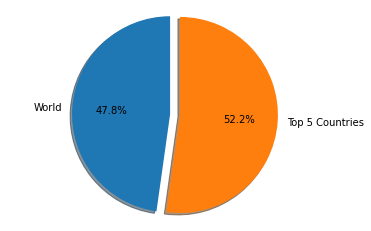

In [334]:
labels = 'World', 'Top 5 Countries'
sizes = [(world_renew_sum-countries_renew_sum), countries_renew_sum]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

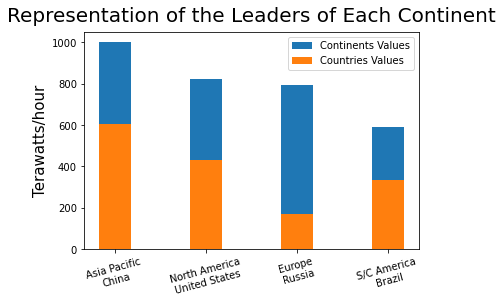

In [350]:
labels = ['Asia Pacific\nChina', 'North America\nUnited States', 'Europe\nRussia', 'S/C America\nBrazil']
conts_values = [ea[1], ea[2], ea[3], ea[5]]
countries_values = [ea[4], ea[6], ea[10], ea[8]]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, conts_values, width, label='Continents Values')
ax.bar(labels, countries_values, width, label='Countries Values')

ax.set_ylabel('Terawatts/hour', size=15)
plt.xticks(rotation=15)
ax.set_title('Representation of the Leaders of Each Continent', size=20, pad=10)
ax.legend()

plt.show()

# Renewable Sources - Share of Energy

In [433]:
renewables_share_energy = energyny[['country','year','renewables_share_energy']]
renewables_share_energy.count()

KeyError: "['year'] not in index"

In [361]:
renewables_share_energy.fillna(0, inplace=True)

C:\Users\Samsung\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [368]:
renewables_share_energy.sort_values('renewables_share_energy',ascending=False, inplace=True)

<ipython-input-368-87a43bc735f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewables_share_energy.sort_values('renewables_share_energy',ascending=False, inplace=True)


In [378]:
renewables_share_energy2 = renewables_share_energy.groupby('country').mean().sort_values('renewables_share_energy',ascending=False)
renewables_share_energy2

,renewables_share_energy
country,
Iceland,59.919364
New Zealand,37.067125
Norway,30.233686
Switzerland,29.660643
Sri Lanka,22.339836
...,...
Honduras,0.000000
Jamaica,0.000000
Jordan,0.000000


In [386]:
renewables_share_energy3 = renewables_share_energy2.loc[renewables_share_energy2['renewables_share_energy'] > 0]
renewables_share_energy3

,renewables_share_energy
country,
Iceland,59.919364
New Zealand,37.067125
Norway,30.233686
Switzerland,29.660643
Sri Lanka,22.339836
...,...
Turkmenistan,0.005675
Qatar,0.004558
Saudi Arabia,0.004018


In [384]:
renewables_share_energy3.tail(42)

,renewables_share_energy
country,
Japan,2.676512
Morocco,2.495567
China,2.402876
Lithuania,2.223805
Australia,2.209231
Greece,2.188661
United States,2.178769
Thailand,2.068174
Malaysia,1.926458


In [391]:
renewables_share_energy3.reset_index(inplace=True)

In [420]:
renewables_share_energy3.head(50)

,country,renewables_share_energy
0,Iceland,59.919364
1,New Zealand,37.067125
2,Norway,30.233686
3,Switzerland,29.660643
4,Sri Lanka,22.339836
5,Croatia,17.936097
6,Latvia,16.983583
7,Brazil,16.715678
8,Finland,16.591161
9,Sweden,14.541347


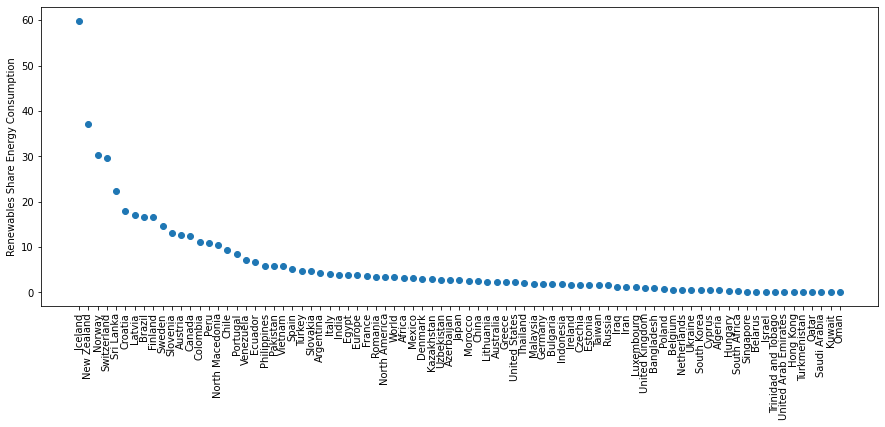

In [417]:
xgraf = renewables_share_energy3['country']
ygraf = renewables_share_energy3['renewables_share_energy']

fig, ax = plt.subplots(figsize=(15, 5.5))
plt.xticks(rotation=90)
ax.set_ylabel('Renewables Share Energy Consumption', size=10)
ax.scatter(xgraf, ygraf)



# Brazil, Iceland, New Zealand, China and Egypt

In [424]:
renewables_share_energy

,country,renewables_share_energy
7199,Iceland,82.835
7198,Iceland,82.545
7200,Iceland,82.367
7197,Iceland,82.334
7201,Iceland,82.011
...,...,...
6436,Greenland,0.000
6437,Greenland,0.000
6438,Greenland,0.000
6439,Greenland,0.000


In [434]:
df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5053439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [438]:
df_2 = df[['country','year','renewables_share_energy']]
df_brazil = df_2.loc[renewables_share_energy['country']=='Brazil']


,country,year,renewables_share_energy
2185,Brazil,1971,25.274
2186,Brazil,1972,25.726
2187,Brazil,1973,24.618
2188,Brazil,1974,25.542
2189,Brazil,1975,26.609
2190,Brazil,1976,27.747
2191,Brazil,1977,29.318
2192,Brazil,1978,29.268
2193,Brazil,1979,30.743
2194,Brazil,1980,33.278


In [442]:
df_brazil.dropna(inplace=True)

<ipython-input-442-5972f3f61910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil.dropna(inplace=True)


In [445]:
df_brazil

,country,year,renewables_share_energy
2179,Brazil,1965,26.319
2180,Brazil,1966,26.386
2181,Brazil,1967,26.641
2182,Brazil,1968,24.385
2183,Brazil,1969,23.901
2184,Brazil,1970,25.423
2185,Brazil,1971,25.274
2186,Brazil,1972,25.726
2187,Brazil,1973,24.618
2188,Brazil,1974,25.542


In [446]:
df_2 = df[['country','year','renewables_share_energy']]
df_iceland = df_2.loc[renewables_share_energy['country']=='Iceland']
df_iceland

,country,year,renewables_share_energy
7152,Iceland,1965,23.831
7153,Iceland,1966,22.105
7154,Iceland,1967,23.785
7155,Iceland,1968,23.237
7156,Iceland,1969,29.315
7157,Iceland,1970,40.186
7158,Iceland,1971,40.203
7159,Iceland,1972,41.097
7160,Iceland,1973,43.535
7161,Iceland,1974,45.894


In [448]:
df_2 = df[['country','year','renewables_share_energy']]
df_nz = df_2.loc[renewables_share_energy['country']=='New Zealand']
df_nz.dropna(inplace=True)
df_nz

<ipython-input-448-a5b4f94096d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz.dropna(inplace=True)


,country,year,renewables_share_energy
10771,New Zealand,1965,37.885
10772,New Zealand,1966,38.167
10773,New Zealand,1967,38.447
10774,New Zealand,1968,39.765
10775,New Zealand,1969,38.756
10776,New Zealand,1970,37.436
10777,New Zealand,1971,40.197
10778,New Zealand,1972,39.759
10779,New Zealand,1973,37.761
10780,New Zealand,1974,38.869


In [450]:
df_2 = df[['country','year','renewables_share_energy']]
df_china = df_2.loc[renewables_share_energy['country']=='China']
df_china.dropna(inplace=True)
df_china

<ipython-input-450-1a758acff0eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_china.dropna(inplace=True)


,country,year,renewables_share_energy
3410,China,1965,4.006
3411,China,1966,3.751
3412,China,1967,3.595
3413,China,1968,4.200
3414,China,1969,3.509
3415,China,1970,2.832
3416,China,1971,2.890
3417,China,1972,3.038
3418,China,1973,3.217
3419,China,1974,3.530


In [451]:
df_2 = df[['country','year','renewables_share_energy']]
df_egypt = df_2.loc[renewables_share_energy['country']=='Egypt']
df_egypt.dropna(inplace=True)
df_egypt.head()

<ipython-input-451-5dd00a041c8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egypt.dropna(inplace=True)


,country,year,renewables_share_energy
4926,Egypt,1965,5.267
4927,Egypt,1966,5.274
4928,Egypt,1967,6.643
4929,Egypt,1968,9.410
4930,Egypt,1969,15.256
4931,Egypt,1970,14.378
4932,Egypt,1971,15.061
4933,Egypt,1972,13.872
4934,Egypt,1973,14.659
4935,Egypt,1974,15.295


In [546]:
df_egypt.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Egypt_RSE'}, inplace=True)
egypt = df_egypt['Egypt_RSE']
egypt.reset_index(drop=True,inplace=True)




In [547]:
egypt

0      5.267
1      5.274
2      6.643
3      9.410
4     15.256
5     14.378
6     15.061
7     13.872
8     14.659
9     15.295
10    15.331
11    15.121
12    15.751
13    16.363
14    14.476
15    12.950
16    11.857
17    10.910
18     9.406
19     8.482
20     7.766
21     7.438
22     7.099
23     6.782
24     6.899
25     7.005
26     6.890
27     6.818
28     6.948
29     7.245
30     7.134
31     6.947
32     6.835
33     6.750
34     7.006
35     7.005
36     6.762
37     6.442
38     5.619
39     5.379
40     5.024
41     4.842
42     5.050
43     5.073
44     4.482
45     4.114
46     4.122
47     3.935
48     3.932
49     3.897
50     4.004
51     3.906
52     3.707
53     3.861
54     4.556
Name: Egypt_RSE, dtype: float64

In [554]:
df_brazil.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Brazil_RSE'}, inplace=True)
df_brazil.reset_index(drop=True,inplace=True)
brazil = df_brazil['Brazil_RSE']
brazil

0     26.319
1     26.386
2     26.641
3     24.385
4     23.901
5     25.423
6     25.274
7     25.726
8     24.618
9     25.542
10    26.609
11    27.747
12    29.318
13    29.268
14    30.743
15    33.278
16    34.638
17    35.656
18    37.685
19    38.505
20    38.720
21    37.149
22    36.762
23    37.893
24    38.184
25    43.859
26    44.440
27    43.476
28    43.727
29    43.138
30    42.923
31    42.655
32    42.060
33    42.135
34    41.706
35    41.859
36    37.819
37    39.480
38    40.939
39    40.915
40    41.760
41    41.636
42    42.989
43    42.015
44    44.945
45    42.868
46    42.450
47    40.629
48    38.350
49    37.398
50    38.632
51    41.467
52    41.150
53    43.790
54    45.017
Name: Brazil_RSE, dtype: float64

In [564]:
df_china.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'China_RSE'}, inplace=True)
df_china.reset_index(drop=True,inplace=True)
china = df_china['China_RSE']
china

0      4.006
1      3.751
2      3.595
3      4.200
4      3.509
5      2.832
6      2.890
7      3.038
8      3.217
9      3.530
10     3.298
11     3.175
12     3.039
13     2.597
14     2.832
15     3.330
16     3.798
17     4.132
18     4.509
19     4.221
20     4.154
21     4.056
22     3.979
23     4.043
24     4.179
25     4.418
26     4.138
27     4.124
28     4.451
29     4.637
30     5.192
31     4.818
32     5.025
33     5.089
34     4.865
35     5.313
36     6.220
37     5.892
38     4.964
39     5.264
40     5.219
41     5.232
42     5.369
43     6.827
44     6.500
45     7.140
46     6.636
47     7.994
48     8.387
49     9.619
50    10.188
51    10.934
52    11.542
53    12.176
54    12.665
Name: China_RSE, dtype: float64

In [566]:
df_nz.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'NZ_RSE'}, inplace=True)
df_nz.reset_index(drop=True,inplace=True)
nz = df_nz['NZ_RSE']
nz

0     37.885
1     38.167
2     38.447
3     39.765
4     38.756
5     37.436
6     40.197
7     39.759
8     37.761
9     38.869
10    41.724
11    37.699
12    35.118
13    37.658
14    42.961
15    45.022
16    45.595
17    41.274
18    42.629
19    41.875
20    39.889
21    41.052
22    39.964
23    40.120
24    44.713
25    39.336
26    38.357
27    35.568
28    38.156
29    39.247
30    39.963
31    37.537
32    33.805
33    36.950
34    33.811
35    34.591
36    31.031
37    33.458
38    32.637
39    36.028
40    33.092
41    33.211
42    33.737
43    32.834
44    36.182
45    37.067
46    37.784
47    35.116
48    35.134
49    35.779
50    36.209
51    37.190
52    35.542
53    36.672
54    35.400
Name: NZ_RSE, dtype: float64

In [567]:
df_iceland.rename(columns={'country':'Country','year':'Year','renewables_share_energy':'Iceland_RSE'}, inplace=True)
df_iceland.reset_index(drop=True,inplace=True)
iceland = df_iceland['Iceland_RSE']
iceland

0     23.831
1     22.105
2     23.785
3     23.237
4     29.315
5     40.186
6     40.203
7     41.097
8     43.535
9     45.894
10    47.011
11    48.465
12    49.052
13    48.594
14    50.933
15    54.423
16    55.270
17    60.023
18    61.320
19    60.607
20    60.024
21    60.715
22    60.199
23    60.681
24    59.397
25    58.891
26    60.115
27    59.552
28    59.615
29    59.611
30    60.160
31    58.376
32    60.845
33    63.259
34    66.128
35    66.581
36    68.461
37    68.570
38    68.490
39    67.693
40    67.457
41    69.839
42    73.328
43    80.334
44    81.746
45    82.334
46    82.545
47    82.835
48    82.367
49    82.011
50    81.019
51    79.078
52    77.943
53    77.400
54    79.080
Name: Iceland_RSE, dtype: float64

In [569]:
c_evolution = pd.concat([egypt,brazil,china,nz,iceland],axis=1)
c_evolution

,Egypt_RSE,Brazil_RSE,China_RSE,NZ_RSE,Iceland_RSE
0,5.267,26.319,4.006,37.885,23.831
1,5.274,26.386,3.751,38.167,22.105
2,6.643,26.641,3.595,38.447,23.785
3,9.410,24.385,4.200,39.765,23.237
4,15.256,23.901,3.509,38.756,29.315
5,14.378,25.423,2.832,37.436,40.186
6,15.061,25.274,2.890,40.197,40.203
7,13.872,25.726,3.038,39.759,41.097
8,14.659,24.618,3.217,37.761,43.535
9,15.295,25.542,3.530,38.869,45.894


In [574]:
years = df_egypt['Year']
years

0     1965
1     1966
2     1967
3     1968
4     1969
5     1970
6     1971
7     1972
8     1973
9     1974
10    1975
11    1976
12    1977
13    1978
14    1979
15    1980
16    1981
17    1982
18    1983
19    1984
20    1985
21    1986
22    1987
23    1988
24    1989
25    1990
26    1991
27    1992
28    1993
29    1994
30    1995
31    1996
32    1997
33    1998
34    1999
35    2000
36    2001
37    2002
38    2003
39    2004
40    2005
41    2006
42    2007
43    2008
44    2009
45    2010
46    2011
47    2012
48    2013
49    2014
50    2015
51    2016
52    2017
53    2018
54    2019
Name: Year, dtype: int64

In [576]:
c_evolution.set_index(years, inplace=True)
c_evolution

,Egypt_RSE,Brazil_RSE,China_RSE,NZ_RSE,Iceland_RSE
Year,,,,,
1965,5.267,26.319,4.006,37.885,23.831
1966,5.274,26.386,3.751,38.167,22.105
1967,6.643,26.641,3.595,38.447,23.785
1968,9.410,24.385,4.200,39.765,23.237
1969,15.256,23.901,3.509,38.756,29.315
1970,14.378,25.423,2.832,37.436,40.186
1971,15.061,25.274,2.890,40.197,40.203
1972,13.872,25.726,3.038,39.759,41.097
1973,14.659,24.618,3.217,37.761,43.535


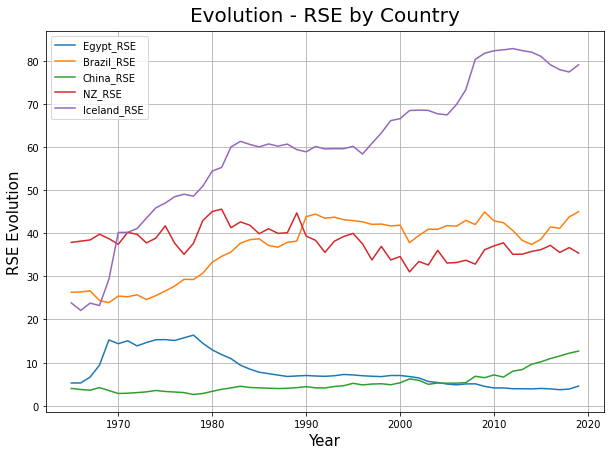

In [609]:
'''x = c_evolution.index
y1 = c_evolution['Egypt_RSE']
y2 = c_evolution['Brazil_RSE']
y3 = c_evolution['China_RSE']
y4 = c_evolution['NZ_RSE']
y5 = c_evolution['Iceland_RSE']'''

fig = plt.figure(figsize=(10,7))
x = c_evolution.index
y = c_evolution['Egypt_RSE']
y1 = c_evolution['Brazil_RSE']
y2 = c_evolution['China_RSE']
y3 = c_evolution['NZ_RSE']
y4 = c_evolution['Iceland_RSE']
plt.errorbar(x,y,label = 'Egypt_RSE')
plt.errorbar(x,y1,label = 'Brazil_RSE')
plt.errorbar(x,y2,label = 'China_RSE')
plt.errorbar(x,y3,label = 'NZ_RSE')
plt.errorbar(x,y4,label = 'Iceland_RSE')
plt.xlabel('Year', size=15)
plt.ylabel('RSE Evolution', size=15)
plt.grid(True)
plt.title('Evolution - RSE by Country', size=20, pad=10)
plt.legend(loc='upper left')